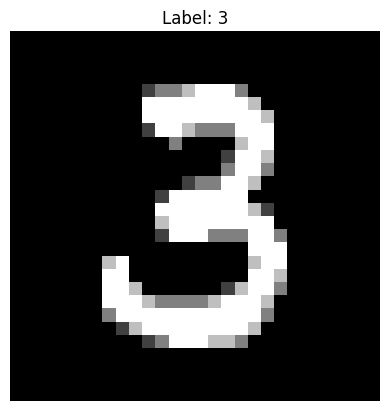

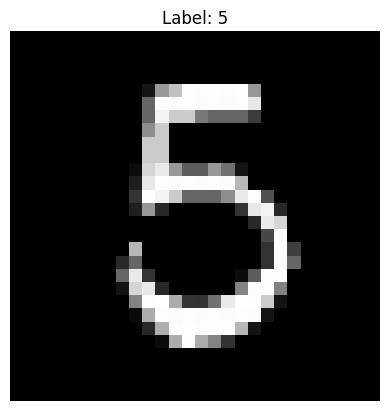

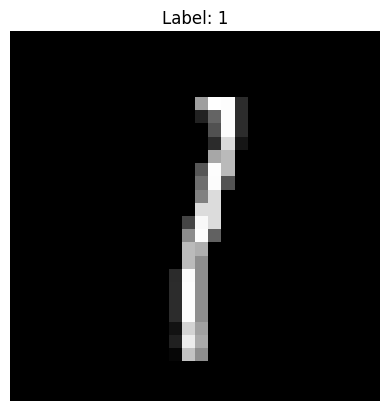

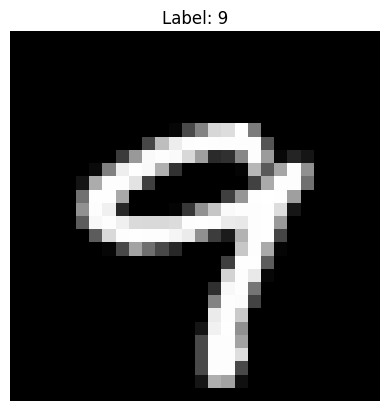

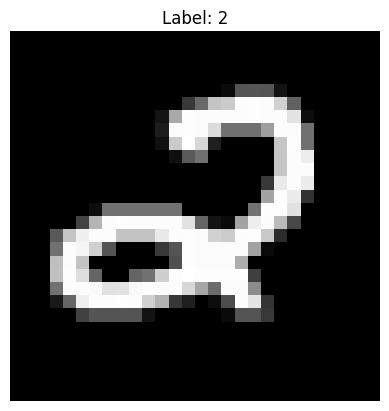

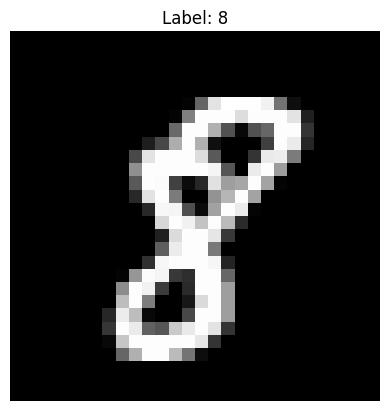

Epoch 1/5, Loss: 0.2573
Epoch 2/5, Loss: 0.1130
Epoch 3/5, Loss: 0.0777
Epoch 4/5, Loss: 0.0595
Epoch 5/5, Loss: 0.0461

Test Accuracy: 97.24%


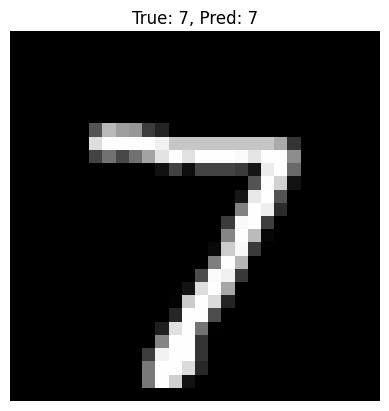

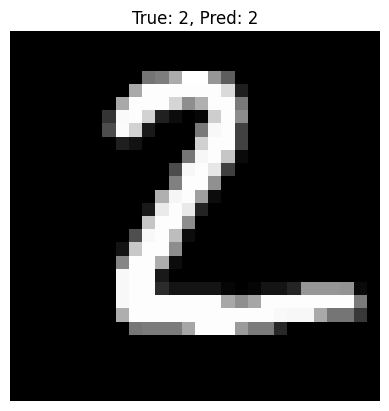

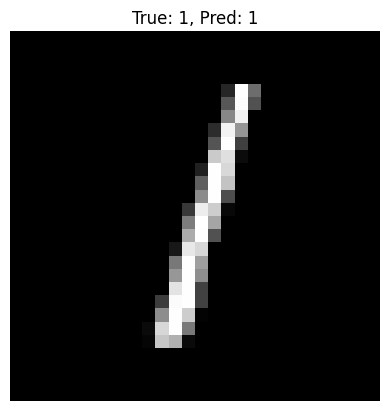

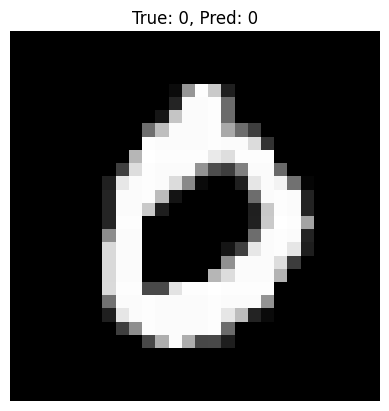

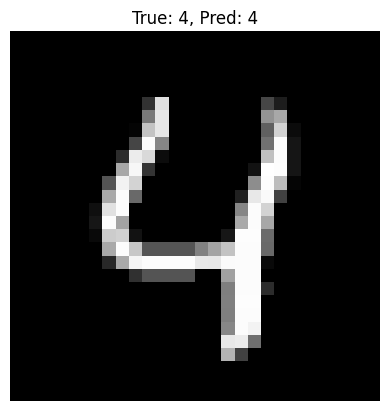

In [1]:
# mnist_digit_classification.py
# MNIST Handwritten Digit Classification using PyTorch

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import torchvision
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

# -----------------------------
# 1. Data Loading & Preprocessing
# -----------------------------
transform = transforms.Compose([
    transforms.ToTensor(),            # Convert to tensor
    transforms.Normalize((0.1307,), (0.3081,))  # Standard MNIST normalization
])

train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# -----------------------------
# 1a. Visualising Sample Images
# -----------------------------
examples = iter(train_loader)
images, labels = next(examples)

for i in range(6):
    plt.imshow(images[i][0], cmap='gray')
    plt.title(f"Label: {labels[i].item()}")
    plt.axis('off')
    plt.show()

# -----------------------------
# 2. Define Neural Network
# -----------------------------
class DigitNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = DigitNet()

# -----------------------------
# 2a. Training the Network
# -----------------------------
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
epochs = 5

for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for data, target in train_loader:
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(train_loader):.4f}")

# -----------------------------
# 3. Evaluation on Test Set
# -----------------------------
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for data, target in test_loader:
        output = model(data)
        _, predicted = torch.max(output, 1)
        total += target.size(0)
        correct += (predicted == target).sum().item()

accuracy = correct / total
print(f"\nTest Accuracy: {accuracy*100:.2f}%")

# -----------------------------
# 3a. Visualising Predictions
# -----------------------------
test_iter = iter(test_loader)
images, labels = next(test_iter)
output = model(images)
_, predicted = torch.max(output, 1)

for i in range(5):
    plt.imshow(images[i][0], cmap='gray')
    plt.title(f"True: {labels[i].item()}, Pred: {predicted[i].item()}")
    plt.axis('off')
    plt.show()
